# Problem 1

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#import cvxpy as cv

In [7]:
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

np.shape(x_d4), np.shape(y_d4)

((200, 4), (200,))

In [8]:
def function(x):
    temp = np.dot(w,x)
    if temp > 0:
        temp = 1
    else:
        temp = 0
    return 2 *temp - 1

In [9]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [10]:
def gradient(x, y, w):
    grad = np.zeros(len(x))
    for x,y in zip(x_d4,y_d4):
        grad += -np.dot(x,y) * (1 - sigmoid(np.dot(np.dot(y, w), x)))
        grad += 2 * lamb * w
    return -grad

## Q1:  Implement batch steepest gradient method

In [11]:
w = np.zeros(len(x_d4[0]))
alpha = 0.00005
lamb = 0.002
loss = []

for iteration in range(0,50):
    correct_num = 0
    for x,y in zip(x_d4,y_d4):
        grad = gradient(x, y, w)
        #print(grad)
        error = y - function(x)
        #print(error)
        if error == 0:
            correct_num += 1
        w = w + alpha * grad
        
    print('#{}: accuracy: {}'.format(iteration, correct_num / len(x_d4)))
    print('w: ',w)
    temp=0
    for x,y in zip(x_d4,y_d4):
        temp += np.log(1 / sigmoid(np.dot(np.dot(y,w), x))) + lamb * np.dot(w,w)
    loss.append(temp)

#0: accuracy: 0.93
w:  [ 0.56944813 -0.19651389  0.07515859 -0.09472275]
#1: accuracy: 0.935
w:  [ 0.9680572  -0.33579348  0.11431128 -0.14900636]
#2: accuracy: 0.94
w:  [ 1.26775266 -0.44472016  0.13642303 -0.18375793]
#3: accuracy: 0.94
w:  [ 1.50582934 -0.53570129  0.15002397 -0.20817503]
#4: accuracy: 0.935
w:  [ 1.7024532  -0.61473776  0.15908308 -0.22653616]
#5: accuracy: 0.935
w:  [ 1.86945157 -0.68507101  0.16559724 -0.24104814]
#6: accuracy: 0.935
w:  [ 2.01427485 -0.74864354  0.17064033 -0.2529576 ]
#7: accuracy: 0.935
w:  [ 2.14189341 -0.80672426  0.17481917 -0.26302192]
#8: accuracy: 0.935
w:  [ 2.25577867 -0.86020111  0.17848866 -0.27172848]
#9: accuracy: 0.935
w:  [ 2.35844671 -0.90972998  0.18186096 -0.27940547]
#10: accuracy: 0.935
w:  [ 2.45177758 -0.9558161   0.18506417 -0.28628211]
#11: accuracy: 0.935
w:  [ 2.53721228 -0.99886161  0.18817554 -0.29252323]
#12: accuracy: 0.935
w:  [ 2.61587925 -1.03919487  0.19124085 -0.29825028]
#13: accuracy: 0.94
w:  [ 2.68867871 -

## Q2:  Implement Newton based method

In [12]:
def hess(x, y, w):
    hess_matrix = np.zeros((len(x_d4[0]),len(x_d4[0])))
    I_matrix = np.ones((len(x_d4[0]),len(x_d4[0])))
    for x,y in zip(x_d4, y_d4):
        z = np.dot(np.dot(y,w), x)
        i = np.reshape(x, (1,4))
        j = np.reshape(x, (4,1))
        hess_matrix += (sigmoid(z) - sigmoid(z) ** 2) * np.dot(j,i)
        hess_matrix += 2 * lamb * I_matrix
        return hess_matrix

In [13]:
w = np.zeros(len(x_d4[0]))
alpha = 0.002
lamb = 0.002
loss_new = []

for iteration in range(0,50):
    correct_num = 0
    for x,y in zip(x_d4, y_d4):
        if y == function(x):
            correct_num += 1
        grad = gradient(x, y, w)
        hess_matrix = np.zeros((len(x_d4[0]),len(x_d4[0])))
        I_matrix = np.identity(len(x_d4[0]))        
        for x,y in zip(x_d4, y_d4):
            z = np.dot(np.dot(y,w), x)
            i = np.reshape(x, (1,4))
            j = np.reshape(x, (4,1))
            hess_matrix += (sigmoid(z) - sigmoid(z) ** 2) * np.dot(j,i)
            hess_matrix += 2 * lamb * I_matrix
        w += alpha * np.dot(np.linalg.inv(hess_matrix),grad)
    print('#{}: accuracy: {}'.format(iteration, correct_num / len(x_d4)))
    print('w: ',w)
    temp=0
    for x,y in zip(x_d4,y_d4):
        temp += np.log(1 / sigmoid(np.dot(np.dot(y,w), x))) + lamb * np.dot(w,w)
    loss_new.append(temp)

#0: accuracy: 0.935
w:  [ 0.59275575 -0.20897083  0.01774667 -0.04750657]
#1: accuracy: 0.935
w:  [ 1.09256938 -0.40340893  0.03604495 -0.08873246]
#2: accuracy: 0.935
w:  [ 1.55967787 -0.60469964  0.05877052 -0.12894714]
#3: accuracy: 0.935
w:  [ 2.0107322  -0.81458305  0.08793273 -0.17063096]
#4: accuracy: 0.935
w:  [ 2.44287512 -1.02630124  0.12348285 -0.21466128]
#5: accuracy: 0.935
w:  [ 2.84242727 -1.22852556  0.16304736 -0.25981434]
#6: accuracy: 0.935
w:  [ 3.1929597  -1.40944939  0.20273964 -0.30319062]
#7: accuracy: 0.94
w:  [ 3.48315238 -1.56093462  0.23879976 -0.34171847]
#8: accuracy: 0.94
w:  [ 3.71076349 -1.68050671  0.2689102  -0.37351096]
#9: accuracy: 0.94
w:  [ 3.881497   -1.77051258  0.29245288 -0.39821179]
#10: accuracy: 0.94
w:  [ 4.00528059 -1.83589335  0.30999411 -0.41655187]
#11: accuracy: 0.94
w:  [ 4.09283948 -1.88219048  0.32262698 -0.42973394]
#12: accuracy: 0.94
w:  [ 4.15371196 -1.91439689  0.33151432 -0.43899688]
#13: accuracy: 0.94
w:  [ 4.19552988 -1.9

## Q3:  Compare the performance of the above two optimization methods

### loss

(40.563153853321936, 40.13796882451266)

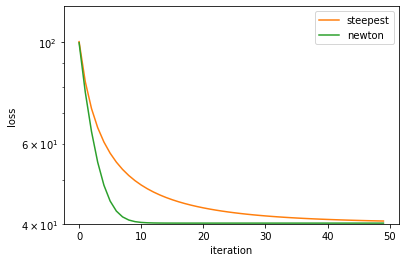

In [14]:
iteration=[]
for i in range(0,50):
    iteration.append(i)
    
plt.semilogy(y)
plt.ylim(40, 120)
#plt.yscale('log')

plt.plot(iteration, loss, label = 'steepest')
plt.plot(iteration, loss_new, label ='newton')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()

loss[49],loss_new[49]

### w(t) - w_hat

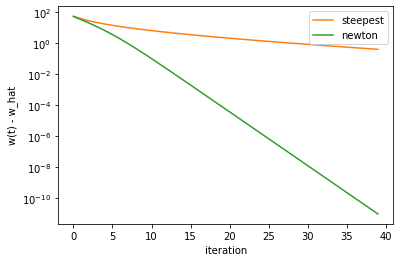

In [57]:
diff_steepest = [loss[i]-loss_new[49] for i in range(0,50)]
diff_newton = [loss_new[i] - loss_new[49] for i in range(0,50)]
iteration=[]
for i in range(0,40):
    iteration.append(i)
    
plt.semilogy(y)
plt.plot(iteration, diff_steepest[:40], label = 'steepest')
plt.plot(iteration, diff_newton[:40], label ='newton')
plt.xlabel('iteration')
plt.ylabel('|w(t) - w_hat|')
plt.legend()

## Q4:  Implement Newton method and simple steepest gradient method for multiclass version of logistic regression


#### I did not make it.

In [30]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

In [146]:
def gradient(x, y, w):
    grad = np.zeros(len(x))
    for x,y in zip(x_d5,y_d5):
        grad += -np.dot(x,y) * (1 - sigmoid(np.dot(np.dot(y, w), x)))
        grad += 2 * lamb * w
    return -grad

In [109]:
#訓練データ数
N = len(x_d5)
#入力次元数
M = len(x_d5[0])
#クラス数
K = len(set(y_d5))
w = np.zeros([K, M])

array([0., 0., 0., 0.])

In [156]:
W = np.zeros([K, M])
alpha = 0.00005
lamb = 0.002
loss = []

for iteration in range(0,50):
    correct_num = 0
    for x,y in zip(x_d5,y_d5):
        y_pred = np.argmax(softmax(np.dot(W, x)))
        grad = gradient(x, y, W[y])
        if y_pred == y:
            correct_num += 1
        W[y] += alpha * grad
        W[y_pred] -= alpha * grad
    print('#{}: accuracy: {}'.format(iteration, correct_num / len(x_d4)))
    print('w: ',w)

#0: accuracy: 0.465
w:  [[-0.07560991  0.72417019 -0.11017792 -0.17224865]
 [-0.07560991  0.72417019 -0.11017792 -0.17224865]
 [-0.07560991  0.72417019 -0.11017792 -0.17224865]]
#1: accuracy: 0.49
w:  [[-0.07560991  0.72417019 -0.11017792 -0.17224865]
 [-0.07560991  0.72417019 -0.11017792 -0.17224865]
 [-0.07560991  0.72417019 -0.11017792 -0.17224865]]
#2: accuracy: 0.51
w:  [[-0.07560991  0.72417019 -0.11017792 -0.17224865]
 [-0.07560991  0.72417019 -0.11017792 -0.17224865]
 [-0.07560991  0.72417019 -0.11017792 -0.17224865]]
#3: accuracy: 0.49
w:  [[-0.07560991  0.72417019 -0.11017792 -0.17224865]
 [-0.07560991  0.72417019 -0.11017792 -0.17224865]
 [-0.07560991  0.72417019 -0.11017792 -0.17224865]]
#4: accuracy: 0.49
w:  [[-0.07560991  0.72417019 -0.11017792 -0.17224865]
 [-0.07560991  0.72417019 -0.11017792 -0.17224865]
 [-0.07560991  0.72417019 -0.11017792 -0.17224865]]


KeyboardInterrupt: 

In [154]:
w = np.zeros([K,M])
alpha = 0.002
lamb = 0.002
loss_new = []

for iteration in range(0,50):
    correct_num = 0
    for x,y in zip(x_d5, y_d5):
        if y == np.argmax(softmax(np.dot(W, x))):
            correct_num += 1
        grad = gradient(x, y, w[y])
        hess_matrix = np.zeros((len(x_d5[0]),len(x_d5[0])))
        I_matrix = np.identity(len(x_d5[0]))        
        for x,y in zip(x_d5, y_d5):
            z = np.dot(np.dot(y,w[y]), x)
            i = np.reshape(x, (1,4))
            j = np.reshape(x, (4,1))
            hess_matrix += (sigmoid(z) - sigmoid(z) ** 2) * np.dot(j,i)
            hess_matrix += 2 * lamb * I_matrix
        w += alpha * np.dot(np.linalg.inv(hess_matrix),grad)
    print('#{}: accuracy: {}'.format(iteration, correct_num / len(x_d4)))
    print('w: ',w)

#0: accuracy: 0.49
w:  [[ 0.02291548  0.33046844 -0.04028803 -0.08913329]
 [ 0.02291548  0.33046844 -0.04028803 -0.08913329]
 [ 0.02291548  0.33046844 -0.04028803 -0.08913329]]
#1: accuracy: 0.49
w:  [[ 0.00483604  0.50594772 -0.06738632 -0.13011189]
 [ 0.00483604  0.50594772 -0.06738632 -0.13011189]
 [ 0.00483604  0.50594772 -0.06738632 -0.13011189]]
#2: accuracy: 0.49
w:  [[-0.02028452  0.60412599 -0.08504542 -0.15038598]
 [-0.02028452  0.60412599 -0.08504542 -0.15038598]
 [-0.02028452  0.60412599 -0.08504542 -0.15038598]]
#3: accuracy: 0.49
w:  [[-0.04209046  0.66080161 -0.09633251 -0.16105924]
 [-0.04209046  0.66080161 -0.09633251 -0.16105924]
 [-0.04209046  0.66080161 -0.09633251 -0.16105924]]
#4: accuracy: 0.49
w:  [[-0.05839688  0.69435485 -0.10348133 -0.16704432]
 [-0.05839688  0.69435485 -0.10348133 -0.16704432]
 [-0.05839688  0.69435485 -0.10348133 -0.16704432]]
#5: accuracy: 0.49
w:  [[-0.069769    0.7146074  -0.10799164 -0.17058009]
 [-0.069769    0.7146074  -0.10799164 -0.

KeyboardInterrupt: 